# Load Imbalance

A script to compare the load balancing paradigms being studied.

In traditional load balancing, the aim is for point solutions that perfectly balance load among the links. But then in periods where the load is fluctuating this previous perfect balance leads to a high degree of transient imbalance. Instead, we propose a new paradigm that aims for a small degree of imbalance in order to better adjust to fluctuating load.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def finish_plot():
    """ Finalizes the details for a plot.
    
    This formats the x and y axes and then displays the plot.
    """
    ticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.xlabel("Average Link Load")
    plt.ylabel("Max Link Load")
    plt.show()

Typical load balancing aims for instantaneous load balance - it wants to minimize the maximum link load which has the effect of keeping all links close to equally loaded.

As schemes explicitly optimize for this, given a fixed load they will converge to a point on the red line in the figure below.

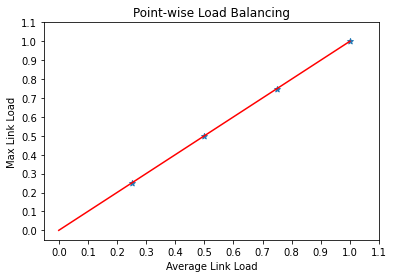

In [3]:
ideal_x = np.array([0, 0.25, 0.5, 0.75, 1.0])
baseline_x = np.array([0.25, 0.5, 0.75, 1.0])

plt.plot(ideal_x, ideal_x, color="red")
plt.scatter(baseline_x, baseline_x, marker='*')
plt.title("Point-wise Load Balancing")
finish_plot()

However, these are only point solutions and don't take into account the effect of changing load. Instead they aim for perfect load balancing at a given load but then as the load in the network changes they must incur a period of rebalancing while they attempt to reconverge to the optimal load balancing point.

This results in behaviour like the black line in the figure below: we achieve periods of perfect balance but inbetween we see periods of high imbalance.

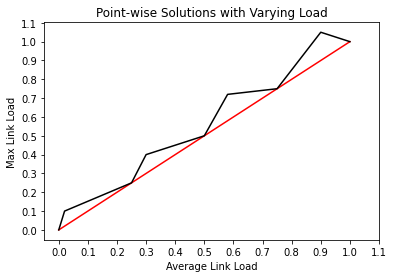

In [4]:
baseline_x = np.array([0, 0.02, 0.25, 0.3, 0.5, 0.58, 0.75, 0.9, 1.0])
baseline_y = np.array([0, 0.1, 0.25, 0.4, 0.5, 0.72, 0.75, 1.05, 1.0])

plt.plot(ideal_x, ideal_x, color="red")
plt.plot(baseline_x, baseline_y, color="black")
plt.title("Point-wise Solutions with Varying Load")
finish_plot()

Instead we propose a set of schemes that allow a small degree of imbalance, with the amount of imbalance allowed inversely proportional to the load. That is, for lower loads we can tolerate more imbalance.

We aim for schemes that always stay between the red and blue lines in the figure. The idea is that by allowing some imbalance we can better react to changing load over time.

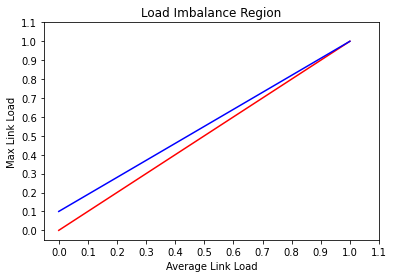

In [5]:
new_x = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
new_y = np.array([0.1, 0.325, 0.55, 0.775, 1.0])

plt.plot(ideal_x, ideal_x, color="red")
plt.plot(new_x, new_y, color="blue")
plt.title("Load Imbalance Region")
finish_plot()

# M/M/1

To illustrate why we can handle a little bit of imbalance and why the amount of imbalance tolerated is inversely proportional to the load, we consider the M/M/1 queue.

In the M/M/1 queue if the utilization is given by $x$ and the average service time is given by $\mu$ then the average time that a job spends in the system (queueing plus service time) is given by $\frac{\mu}{1 - x}$. Below we consider when the service time $\mu = 1$. Note that for different service times the results are the same, it is just a multiplicative scaling of the graph.

In [8]:
def finalize_mm1_plot():
    """Finalizes the details for a M/M/1 delay plot.
    
    """
    plt.xlabel("Utilization")
    plt.ylabel("Average Time in System")
    plt.title("M/M/1 Queue: Average Time in System")
    plt.show()

With $\mu = 1$ the utilization vs average time in system is given by:

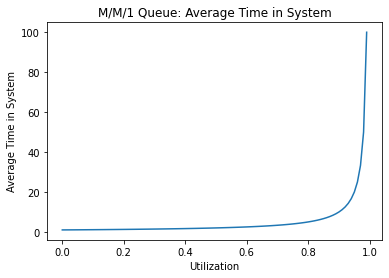

In [9]:
mu = 1
x = np.linspace(0, 0.99, 100)
y = (mu / (1 - x))
plt.plot(x, y)
finalize_mm1_plot()

Now notice that if we are at a point $a$ representing utilization of 50% and we increase the utilization by 5% to reach a point $b$ at 55% utilization then the average time in the system increases by a negligible amount.

In contrast, if we are at a point $c$ representing 93% utilization and we increase the utilization by 5% to reach a point $d$ at 98% utilization then the average time in the system increases significantly.

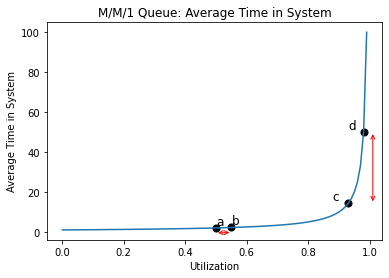

In [11]:
plt.plot(x, y)

x1 = np.array([0.5, 0.55])
y1 = (mu / (1 - x1))
plt.scatter(x1, y1, marker='o', s=50, color="black")
plt.text(x1[0], y1[0] + 1.5, 'a', fontsize=12)
plt.text(x1[1], y1[1] + 1.5, 'b', fontsize=12)
plt.annotate(text="", xy=(x1[0], y1[0]-2.5), xytext=(x1[1], y1[1]-2.5),
             arrowprops=dict(arrowstyle='<->', color='red'))

x2 = np.array([0.93, 0.98])
y2 = (mu / (1 - x2))
plt.scatter(x2, y2, marker='o', s=50, color="black")
plt.text(x2[0] - 0.05, y2[0] + 1.5, "c", fontsize=12)
plt.text(x2[1] - 0.05, y2[1] + 1.5, "d", fontsize=12)
plt.annotate(text="", xy=(x2[1]+0.03, y2[0]), xytext=(x2[1]+0.03, y2[1]),
             arrowprops=dict(arrowstyle='<->', color='red'))

finalize_mm1_plot()

This now illustrates the imbalance argument. We can think of this utilization as the utilization of a link and the time in system as the time queueing plus being transmitted on the link. If we add slightly more than the average load to a given link when we are at low loads then the change is negligible. However, if we add a bit of load when the utilization is high, the change in delay is significant. This illustrates that at low loads we can handle some imbalance whereas as loads converge towards capacity, a scheme should converge towards perfect balance.